In [18]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
#import sklearn.metrics as metrics

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('./2023-S2-FOAI-assignment.csv')

In [20]:
# view the first six rows of the dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M


In [21]:
data["job_title"] = data["job_title"].astype('category')
data["employment_type"] = data["employment_type"].astype('category')
data["experience_level"] = data["experience_level"].astype('category')
data["employee_residence"] = data["employee_residence"].astype('category')
data["company_location"] = data["company_location"].astype('category')
data["company_size"] = data["company_size"].astype('category')


In [22]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

work_year:
	 Mean = 2022.08
	 Standard deviation = 0.82
	 Minimum = 2020.00
	 Maximum = 2023.00
salary:
	 Mean = 233400.38
	 Standard deviation = 1016739.42
	 Minimum = 7500.00
	 Maximum = 30400000.00
salary_in_usd:
	 Mean = 130933.81
	 Standard deviation = 66668.02
	 Minimum = 5409.00
	 Maximum = 450000.00
remote_ratio:
	 Mean = 57.07
	 Standard deviation = 47.27
	 Minimum = 0.00
	 Maximum = 100.00


In [23]:
# Checking for missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                6
salary_currency       0
salary_in_usd         6
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
# Checking for missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [26]:
# checking for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))
# drop duplicates
data = data.drop_duplicates()

Number of duplicates: 241


In [27]:
# checking for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 0


In [28]:
# Checking for outliers
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1253.000000,1.253000e+03,1253.000000,1253.000000
mean,2022.027933,2.506594e+05,129141.169194,56.624102
std,0.853494,1.108966e+06,69125.374255,46.909436
min,2020.000000,7.500000e+03,5409.000000,0.000000
25%,2022.000000,8.166600e+04,76833.000000,0.000000
50%,2022.000000,1.323200e+05,125000.000000,100.000000
75%,2023.000000,1.850000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [29]:
import numpy as np

# calculate the upper and lower limits
q1 = data['salary'].quantile(0.25)
q3 = data['salary'].quantile(0.75)
IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

# create arrays of Boolean values indicating the outlier rows
lower_mask = data['salary'] < lower
upper_mask = data['salary'] > upper

# check if there are outliers
if lower_mask.any() or upper_mask.any():
    outliers = data[lower_mask | upper_mask]
    cleaned_data = data[~(lower_mask | upper_mask)].reset_index(drop=True)
    print('Outliers:')
    print(outliers)
    print('No of outliers:', len(outliers))
    print("Old:", data.shape)
    print("New:", cleaned_data.shape)
else:
    print("No outliers to remove. Data shape remains unchanged.")

Outliers:
      work_year experience_level employment_type  \
33         2023               SE              FT   
41         2022               MI              FT   
80         2023               MI              FT   
133        2023               SE              FT   
156        2023               MI              FT   
217        2023               EN              FT   
478        2023               EX              FT   
531        2022               EN              FT   
545        2022               EN              FT   
617        2022               EN              FT   
711        2022               SE              FT   
768        2022               MI              FT   
805        2021               EN              FT   
806        2022               MI              FT   
820        2022               MI              FL   
864        2020               EN              FT   
937        2022               EX              FT   
1167       2022               MI              FT   
11

In [30]:
import numpy as np

# calculate the upper and lower limits
q1 = data['salary_in_usd'].quantile(0.25)
q3 = data['salary_in_usd'].quantile(0.75)
IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

# create arrays of Boolean values indicating the outlier rows
lower_mask = data['salary_in_usd'] < lower
upper_mask = data['salary_in_usd'] > upper

# check if there are outliers
if lower_mask.any() or upper_mask.any():
    outliers = data[lower_mask | upper_mask]
    cleaned_data = data[~(lower_mask | upper_mask)].reset_index(drop=True)
    print('Outliers:')
    print(outliers)
    print('No of outliers:', len(outliers))
    print("Old:", data.shape)
    print("New:", cleaned_data.shape)
else:
    print("No outliers to remove. Data shape remains unchanged.")

Outliers:
      work_year experience_level employment_type  \
33         2023               SE              FT   
133        2023               SE              FT   
228        2023               EX              FT   
478        2023               EX              FT   
1155       2022               EX              FT   
1208       2022               SE              FT   
1213       2022               SE              FT   
1267       2020               MI              FT   
1420       2021               EX              CT   
1442       2020               EX              FT   
1492       2021               MI              FT   
1495       2020               SE              FT   

                               job_title    salary salary_currency  \
33              Computer Vision Engineer  342810.0             USD   
133            Machine Learning Engineer  342300.0             USD   
228                         Head of Data  329500.0             USD   
478             Director of Data 

In [31]:
import numpy as np

# calculate the upper and lower limits
q1 = data['work_year'].quantile(0.25)
q3 = data['work_year'].quantile(0.75)
IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

# create arrays of Boolean values indicating the outlier rows
lower_mask = data['work_year'] < lower
upper_mask = data['work_year'] > upper

# check if there are outliers
if lower_mask.any() or upper_mask.any():
    outliers = data[lower_mask | upper_mask]
    cleaned_data = data[~(lower_mask | upper_mask)].reset_index(drop=True)
    print('Outliers:')
    print(outliers)
    print('No of outliers:', len(outliers))
    print("Old:", data.shape)
    print("New:", cleaned_data.shape)
else:
    print("No outliers to remove. Data shape remains unchanged.")

Outliers:
      work_year experience_level employment_type                  job_title  \
183        2020               EX              FT         Staff Data Analyst   
864        2020               EN              FT              Data Engineer   
883        2020               EN              FT               Data Analyst   
908        2020               EN              FT             Data Scientist   
1164       2020               SE              FT   Machine Learning Manager   
...         ...              ...             ...                        ...   
1488       2020               MI              FT              Data Engineer   
1489       2020               SE              FT  Machine Learning Engineer   
1495       2020               SE              FT             Data Scientist   
1497       2020               EN              FT             Data Scientist   
1498       2020               EN              CT      Business Data Analyst   

         salary salary_currency  salary_i

In [32]:
import numpy as np

# calculate the upper and lower limits
q1 = data['work_year'].quantile(0.25)
q3 = data['work_year'].quantile(0.75)
IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

# create arrays of Boolean values indicating the outlier rows
lower_mask = data['work_year'] < lower
upper_mask = data['work_year'] > upper

# check if there are outliers
if lower_mask.any() or upper_mask.any():
    outliers = data[lower_mask | upper_mask]
    cleaned_data = data[~(lower_mask | upper_mask)].reset_index(drop=True)
    print('Outliers:')
    print(outliers)
    print('No of outliers:', len(outliers))
    print("Old:", data.shape)
    print("New:", cleaned_data.shape)
else:
    print("No outliers to remove. Data shape remains unchanged.")

Outliers:
      work_year experience_level employment_type                  job_title  \
183        2020               EX              FT         Staff Data Analyst   
864        2020               EN              FT              Data Engineer   
883        2020               EN              FT               Data Analyst   
908        2020               EN              FT             Data Scientist   
1164       2020               SE              FT   Machine Learning Manager   
...         ...              ...             ...                        ...   
1488       2020               MI              FT              Data Engineer   
1489       2020               SE              FT  Machine Learning Engineer   
1495       2020               SE              FT             Data Scientist   
1497       2020               EN              FT             Data Scientist   
1498       2020               EN              CT      Business Data Analyst   

         salary salary_currency  salary_i

In [33]:
data['work_year'].value_counts()

2022    562
2023    400
2021    217
2020     74
Name: work_year, dtype: int64

In [34]:
#1179 rows, 11 columns

In [35]:
import numpy as np

data['remote_ratio'] = pd.to_numeric(data['remote_ratio'], errors='coerce')

# calculate the upper and lower limits
q1 = data['remote_ratio'].quantile(0.25)
q3 = data['remote_ratio'].quantile(0.75)
IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

# create arrays of Boolean values indicating the outlier rows
lower_mask = data['remote_ratio'] < lower
upper_mask = data['remote_ratio'] > upper

# check if there are outliers
if lower_mask.any() or upper_mask.any():
    outliers = data[lower_mask | upper_mask]
    cleaned_data = data[~(lower_mask | upper_mask)].reset_index(drop=True)
    print('Outliers:')
    print(outliers)
    print('No of outliers:', len(outliers))
    print("Old:", data.shape)
    print("New:", cleaned_data.shape)
else:
    print("No outliers to remove. Data shape remains unchanged.")

No outliers to remove. Data shape remains unchanged.


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1253 non-null   int64   
 1   experience_level    1253 non-null   category
 2   employment_type     1253 non-null   category
 3   job_title           1253 non-null   category
 4   salary              1253 non-null   float64 
 5   salary_currency     1253 non-null   object  
 6   salary_in_usd       1253 non-null   float64 
 7   employee_residence  1253 non-null   category
 8   remote_ratio        1253 non-null   int64   
 9   company_location    1253 non-null   category
 10  company_size        1253 non-null   category
dtypes: category(6), float64(2), int64(2), object(1)
memory usage: 74.2+ KB


In [37]:
# Checking for the correlation
data.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.099283,0.322340,-0.236041
salary,-0.099283,1.000000,-0.070120,0.017001
salary_in_usd,0.322340,-0.070120,1.000000,-0.108558
remote_ratio,-0.236041,0.017001,-0.108558,1.000000


In [38]:
# Calculate the skewness for all columns
data.skew(numeric_only=True)

work_year        -0.624648
salary           18.797482
salary_in_usd     0.642597
remote_ratio     -0.266316
dtype: float64

In [39]:
# Checking for the unique values
data.nunique()
#q3

work_year               4
experience_level        4
employment_type         4
job_title              69
salary                520
salary_currency        17
salary_in_usd         656
employee_residence     61
remote_ratio            3
company_location       58
company_size            3
dtype: int64

In [40]:
# calculate means and medians of subgroups
mystat = cleaned_data.groupby('job_title').agg(mean_salary=('salary','mean'),
                       med_salary_in_usd=('salary_in_usd','median'),
                       no_of_samples=('job_title','count')).reset_index()
mystat=mystat.round(2)
# sorting mystat
mystat.sort_values('no_of_samples',ascending=False).head(5)

#q4

,job_title,mean_salary,med_salary_in_usd,no_of_samples
26,Data Engineer,154498.17,131300.0,263
35,Data Scientist,323633.62,136994.0,261
19,Data Analyst,106492.93,104300.0,169
53,Machine Learning Engineer,231581.35,135000.0,94
3,Analytics Engineer,155971.49,152500.0,47


In [41]:
# calculate means and medians of subgroups
mystat = cleaned_data.groupby('employment_type').agg(mean_salary=('salary_in_usd','mean'),
                       med_salary_in_usd=('salary_in_usd','median'),
                       no_of_samples=('employment_type','count')).reset_index()
mystat=mystat.round(2)
# sorting mystat
mystat.sort_values('no_of_samples',ascending=False).head(5)


,employment_type,mean_salary,med_salary_in_usd,no_of_samples
2,FT,132638.99,130000.0,1156
3,PT,41971.90,23841.0,10
0,CT,118058.62,45234.5,8
1,FL,42504.60,30523.0,5


In [42]:
top_5_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']
filtered_data = cleaned_data[cleaned_data['job_title'].isin(top_5_job_titles)]

In [43]:
df = cleaned_data.groupby(['experience_level','remote_ratio']).agg(sample_count=('remote_ratio','count'))
df['%'] = (100 * df['sample_count'] / df.groupby('experience_level')['sample_count'].transform('sum')).round(2)
print(df)
#q5

                               sample_count      %
experience_level remote_ratio                     
EN               0                       28  20.90
                 50                      32  23.88
                 100                     74  55.22
EX               0                       24  43.64
                 50                       4   7.27
                 100                     27  49.09
MI               0                      106  35.93
                 50                      44  14.92
                 100                    145  49.15
SE               0                      306  44.03
                 50                      28   4.03
                 100                    361  51.94


In [44]:
df = cleaned_data.groupby(['employment_type','remote_ratio']).agg(sample_count=('remote_ratio','count'))
df['%'] = (100 * df['sample_count'] / df.groupby('employment_type')['sample_count'].transform('sum')).round(2)
print(df)

                              sample_count      %
employment_type remote_ratio                     
CT              0                        0   0.00
                50                       1  12.50
                100                      7  87.50
FL              0                        1  20.00
                50                       2  40.00
                100                      2  40.00
FT              0                      463  40.05
                50                      99   8.56
                100                    594  51.38
PT              0                        0   0.00
                50                       6  60.00
                100                      4  40.00


In [45]:
df = cleaned_data.query('(work_year==2021) and (remote_ratio==100)')
df = df.groupby(['company_location']).agg(sample_count=('remote_ratio','count'))
df = df.sort_values(by=['sample_count'],ascending=False)
print(df.head(5))
#q6

                  sample_count
company_location              
US                          66
IN                           8
CA                           7
DE                           5
ES                           5


In [46]:
salary_trends = filtered_data.groupby(['work_year','job_title'])['salary_in_usd'].mean().unstack()
salary_trends

job_title,3D Computer Vision Researcher,AI Developer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,BI Data Analyst,BI Data Engineer,...,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Engineer,Research Scientist,Staff Data Analyst,Staff Data Scientist
work_year,,,,,,,,,,,,,,,,,,,,,
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,NaN,NaN,NaN,146382.846154,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,169477.619048,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


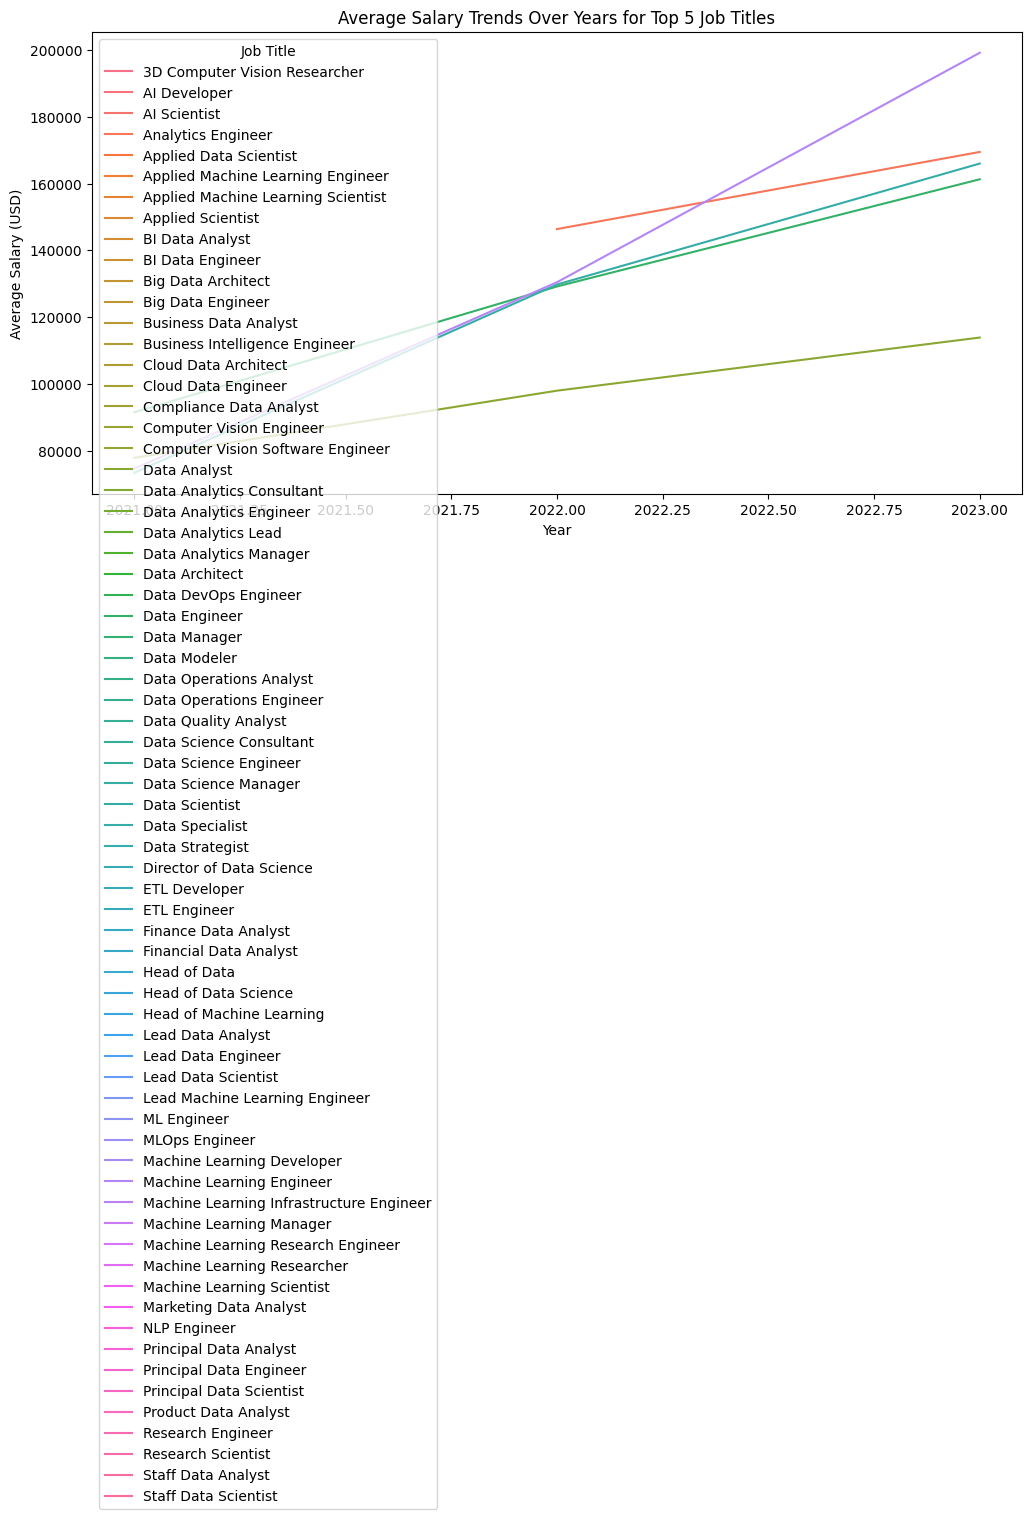

In [47]:
# Count the occurrences of each job title
top_job_titles = cleaned_data['job_title'].value_counts().head(5).index

# Filter the dataset for the top 5 job titles
data_top_jobs = cleaned_data[cleaned_data['job_title'].isin(top_job_titles)]

# Group by year and job title, calculate the average salary
avg_salary_by_year_job = data_top_jobs.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

# Plotting average salary trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_salary_by_year_job, x='work_year', y='salary_in_usd', hue='job_title')
plt.title('Average Salary Trends Over Years for Top 5 Job Titles')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Job Title')
plt.show()
#q7

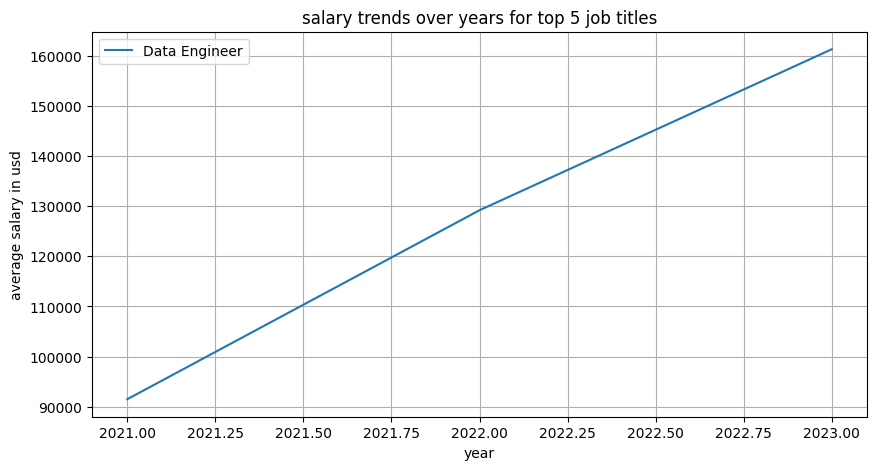

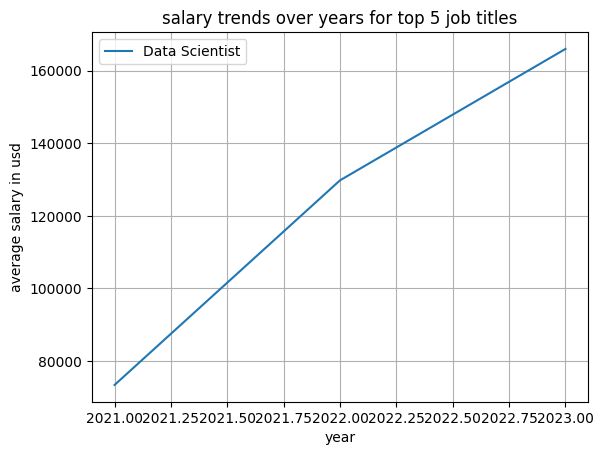

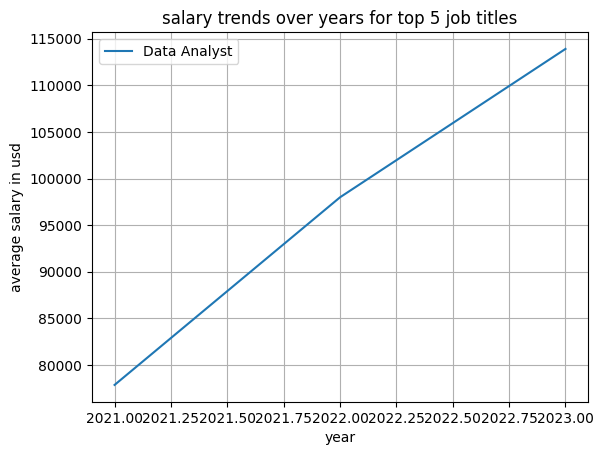

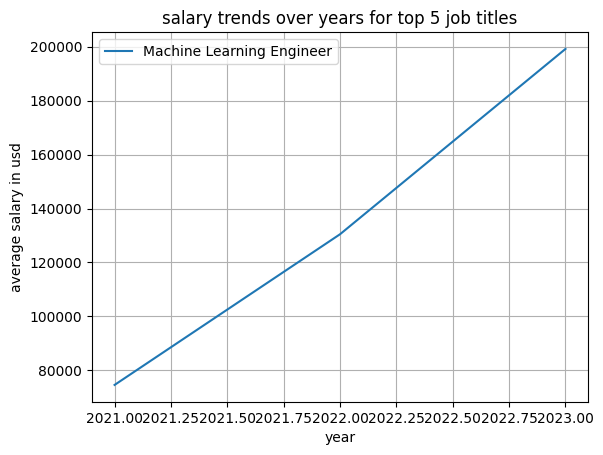

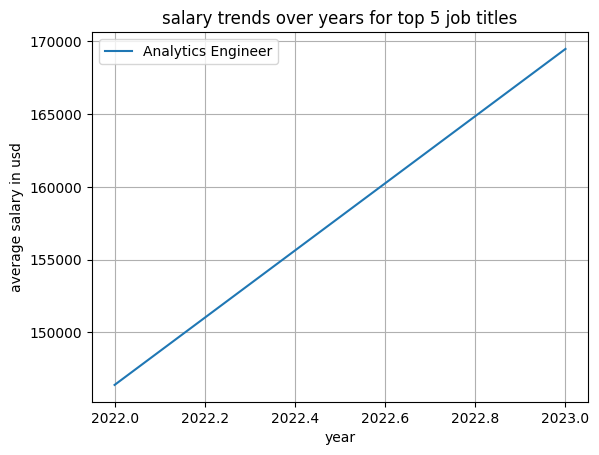

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(10,5))
for job_title in top_5_job_titles:
  plt.plot(salary_trends.index, salary_trends[job_title], label=job_title)
  plt.title('salary trends over years for top 5 job titles')
  plt.xlabel('year')
  plt.ylabel('average salary in usd')
  plt.legend()
  plt.grid(True)
  plt.show()
  #save plot
  plt.savefig('salarytop5.png', dpi=600)

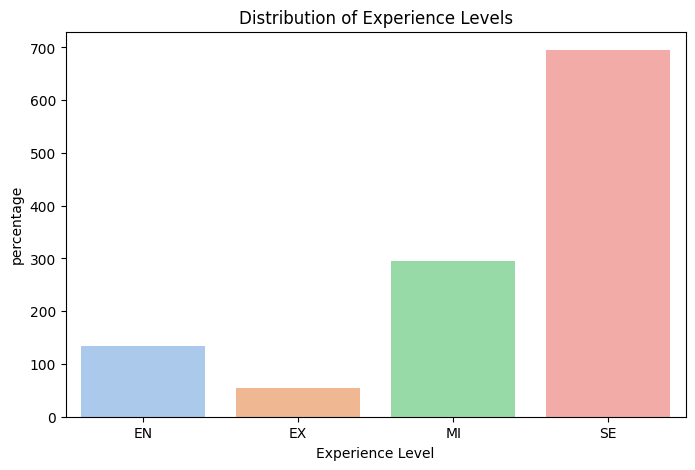

In [49]:
# Distribution of experience levels
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_data, x='experience_level', palette='pastel')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('percentage')
plt.show()
#tu gio tro di la q8

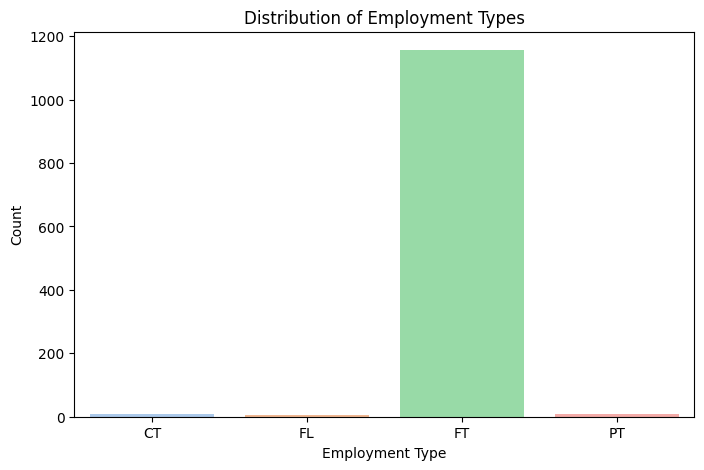

In [50]:
# Distribution of employment types
plt.figure(figsize=(8, 5))
sns.countplot(data=cleaned_data, x='employment_type', palette='pastel')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [51]:
cleaned_data['employment_type'].value_counts()

FT    1156
PT      10
CT       8
FL       5
Name: employment_type, dtype: int64

In [52]:
data['employment_type'].value_counts()

FT    1226
PT      12
CT       9
FL       6
Name: employment_type, dtype: int64

In [53]:
data['experience_level'].value_counts()

SE    713
MI    326
EN    156
EX     58
Name: experience_level, dtype: int64

In [54]:
data['job_title'].value_counts()

Data Scientist                       282
Data Engineer                        277
Data Analyst                         177
Machine Learning Engineer             98
Analytics Engineer                    47
                                    ... 
Cloud Data Architect                   1
Big Data Architect                     1
BI Data Engineer                       1
Applied Machine Learning Engineer      1
Staff Data Scientist                   1
Name: job_title, Length: 69, dtype: int64

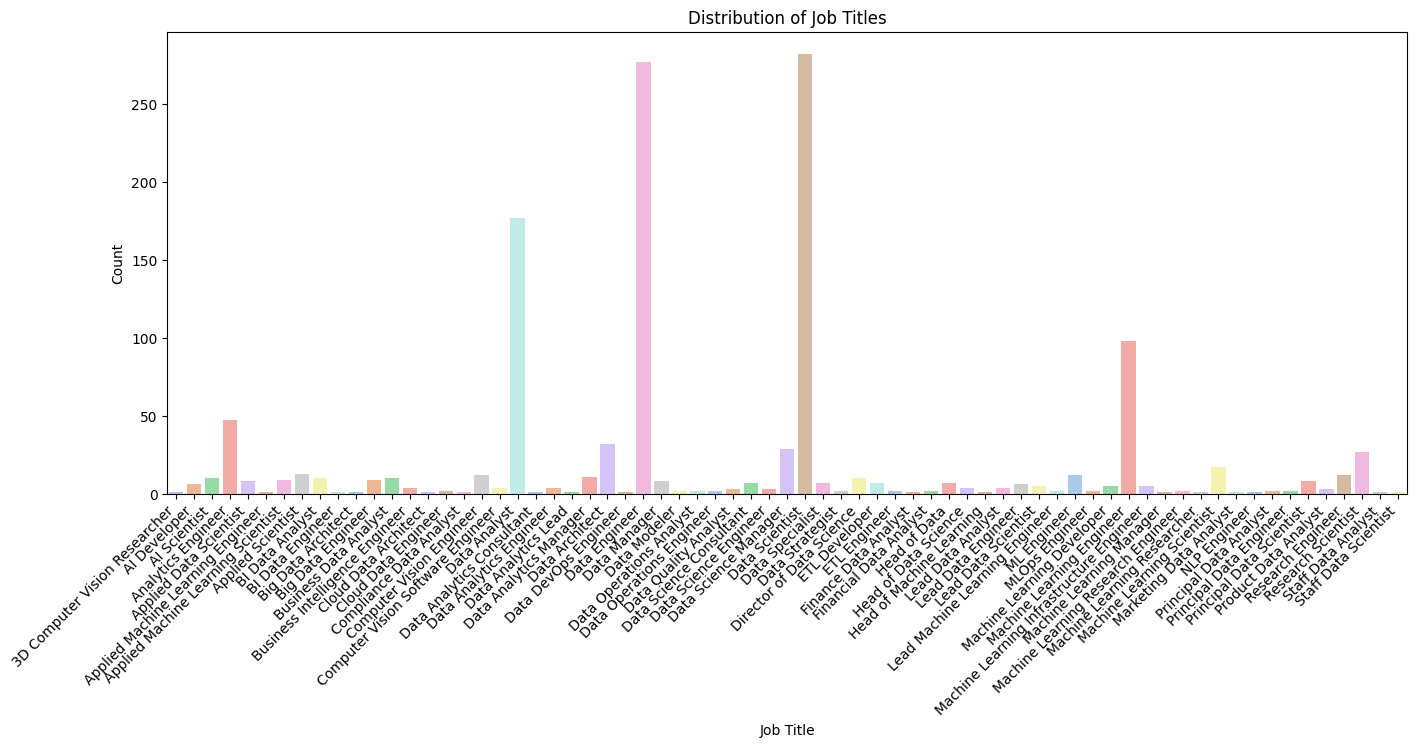

In [55]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='job_title', palette='pastel')
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [56]:
most_common_experience_level = data['experience_level'].value_counts().idxmax()
most_common_employment_type = data['employment_type'].value_counts().idxmax()
most_common_job_title = data['job_title'].value_counts().idxmax()

print(f"The experience level with the highest representation is: {most_common_experience_level}")
print(f"The employment type with the highest representation is: {most_common_employment_type}")
print(f"The job title with the highest representation is: {most_common_job_title}")

The experience level with the highest representation is: SE
The employment type with the highest representation is: FT
The job title with the highest representation is: Data Scientist


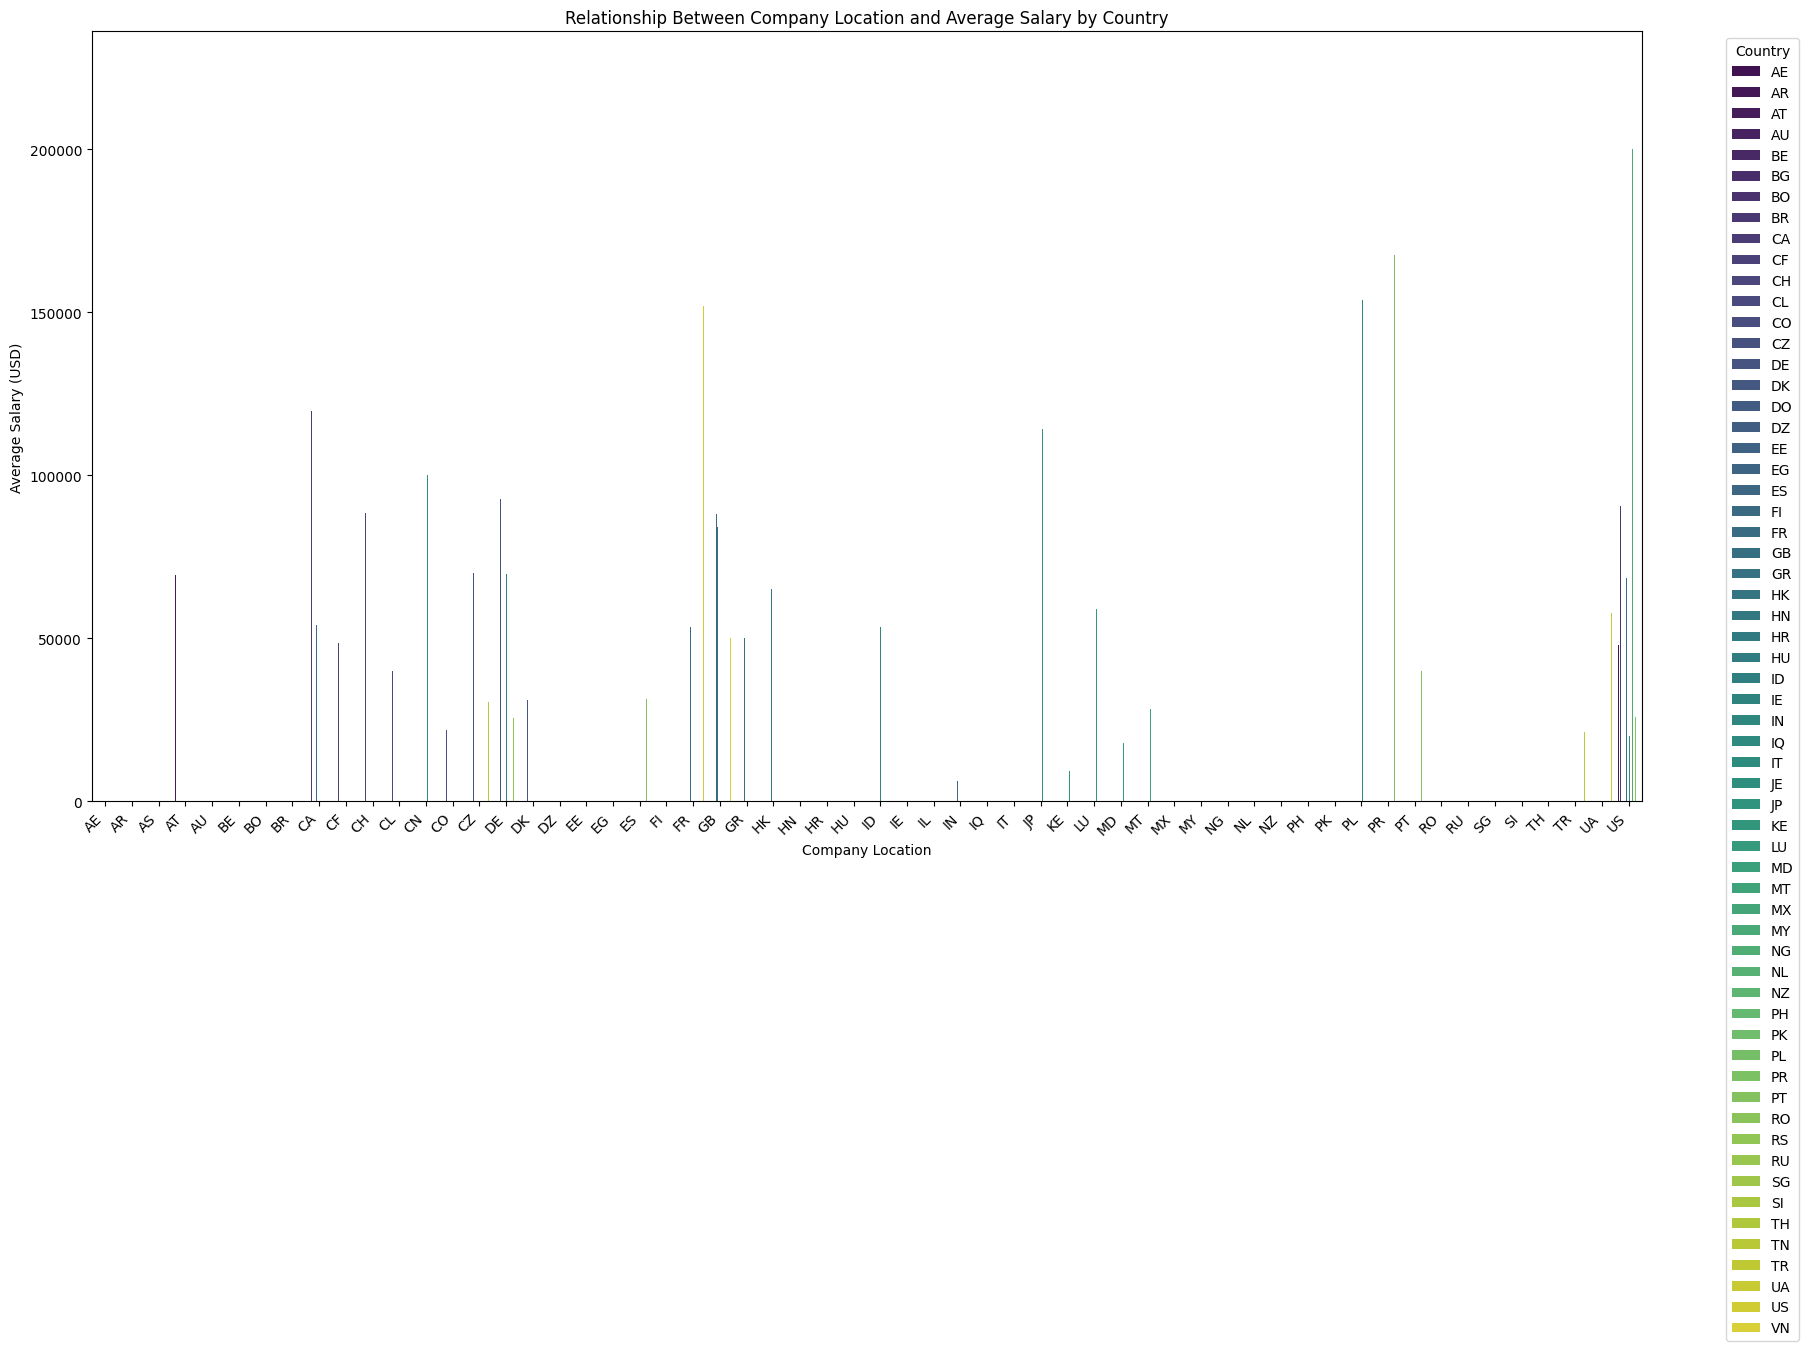

In [57]:
# Group by company location and country, calculate the average salary
avg_salary_by_location_country = data.groupby(['company_location', 'employee_residence'])['salary_in_usd'].mean().reset_index()

# Plotting the relationship between company location and average salary in different countries
plt.figure(figsize=(20, 10))
sns.barplot(data=avg_salary_by_location_country, x='company_location', y='salary_in_usd', hue='employee_residence', errorbar=None, palette='viridis')
plt.title('Relationship Between Company Location and Average Salary by Country')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#q9

Text(0, 0.5, 'Average Salary (USD)')

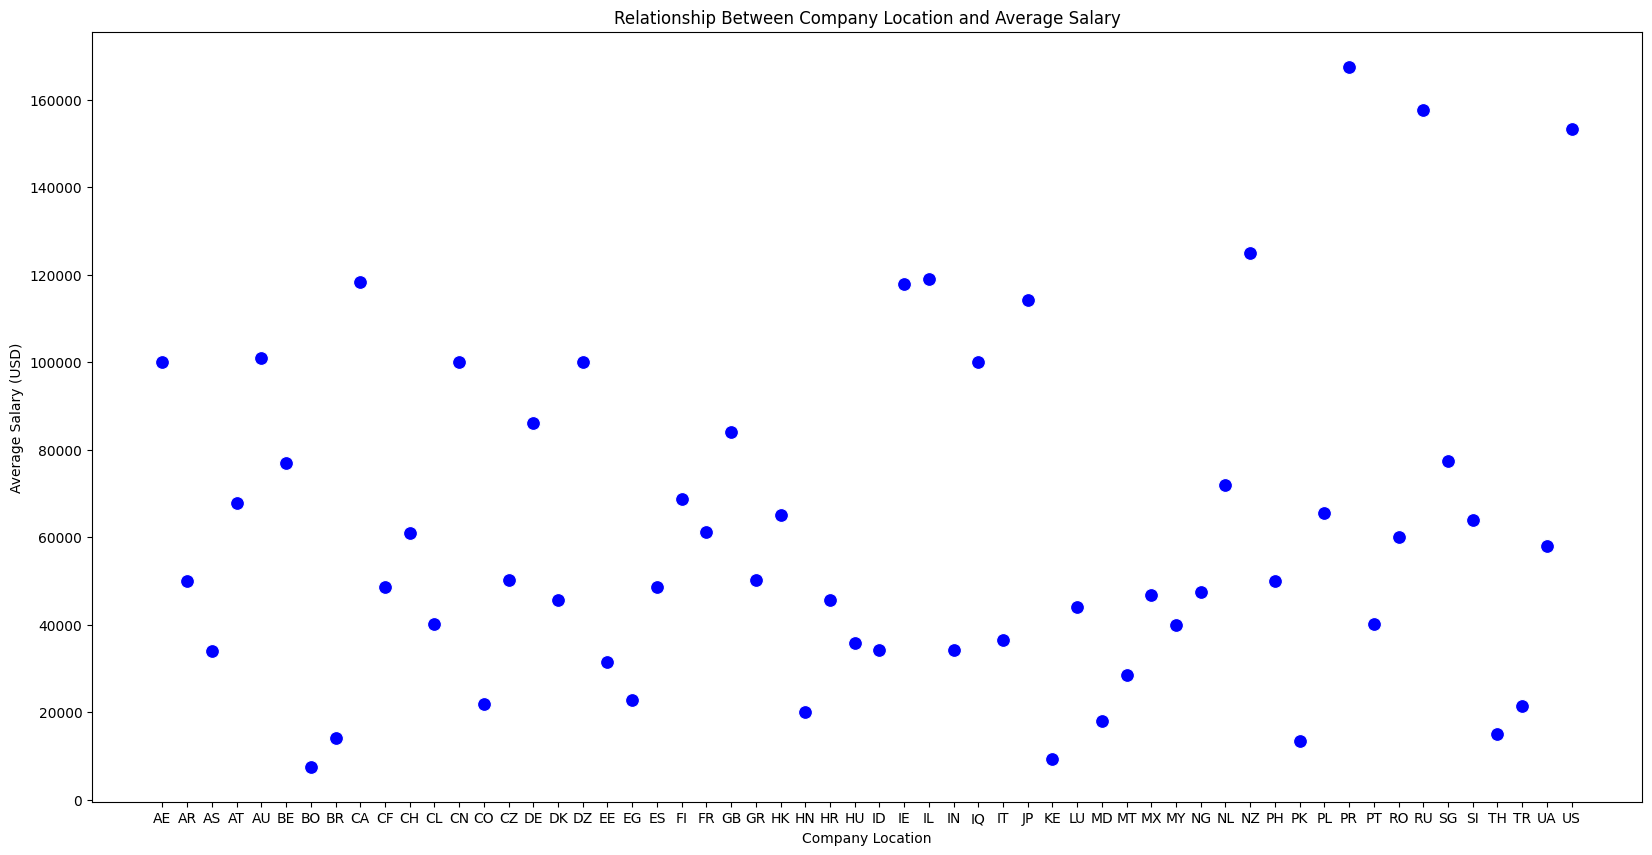

In [58]:
avg_salary_vs_location_by_exp = data.groupby(['company_location'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(20, 10))
sns.scatterplot(data=avg_salary_vs_location_by_exp, x='company_location', y='salary_in_usd', color='blue', s=100)
plt.title('Relationship Between Company Location and Average Salary')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')

<ipython-input-59-cdc6f70715d5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='company_location', y='salary_in_usd', ci=None, palette='viridis')


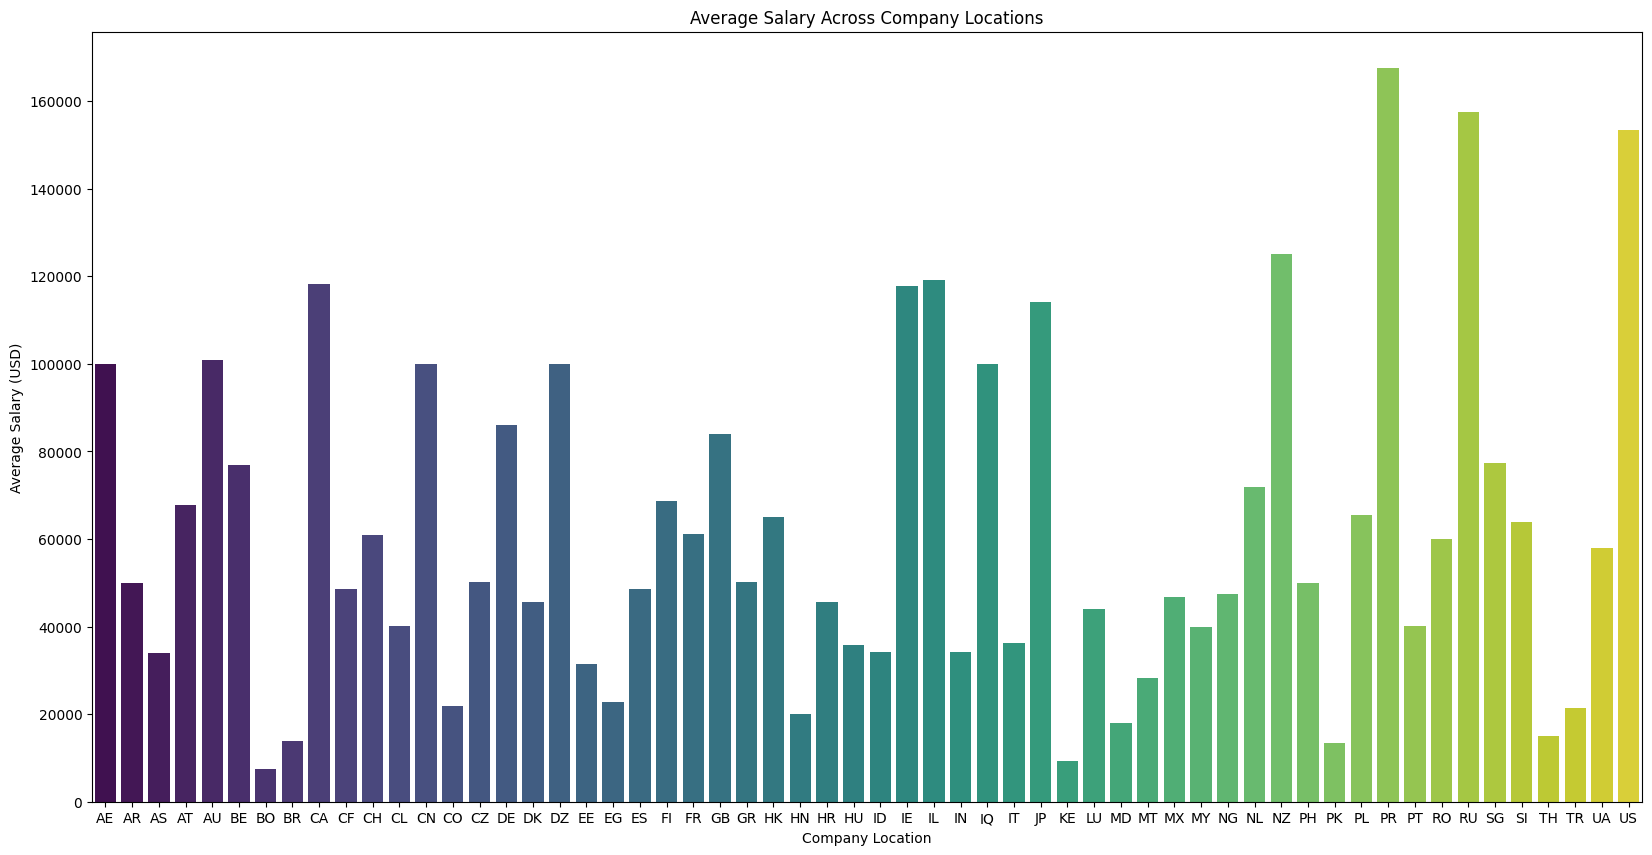

In [59]:
plt.figure(figsize=(20, 10))
sns.barplot(data=data, x='company_location', y='salary_in_usd', ci=None, palette='viridis')
plt.title('Average Salary Across Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.show()

In [60]:
avg_salary_by_location_country

,company_location,employee_residence,salary_in_usd
0,AE,AE,100000.0
1,AE,AR,NaN
2,AE,AT,NaN
3,AE,AU,NaN
4,AE,BE,NaN
...,...,...,...
3533,US,TN,NaN
3534,US,TR,NaN
3535,US,UA,NaN
3536,US,US,155837.6


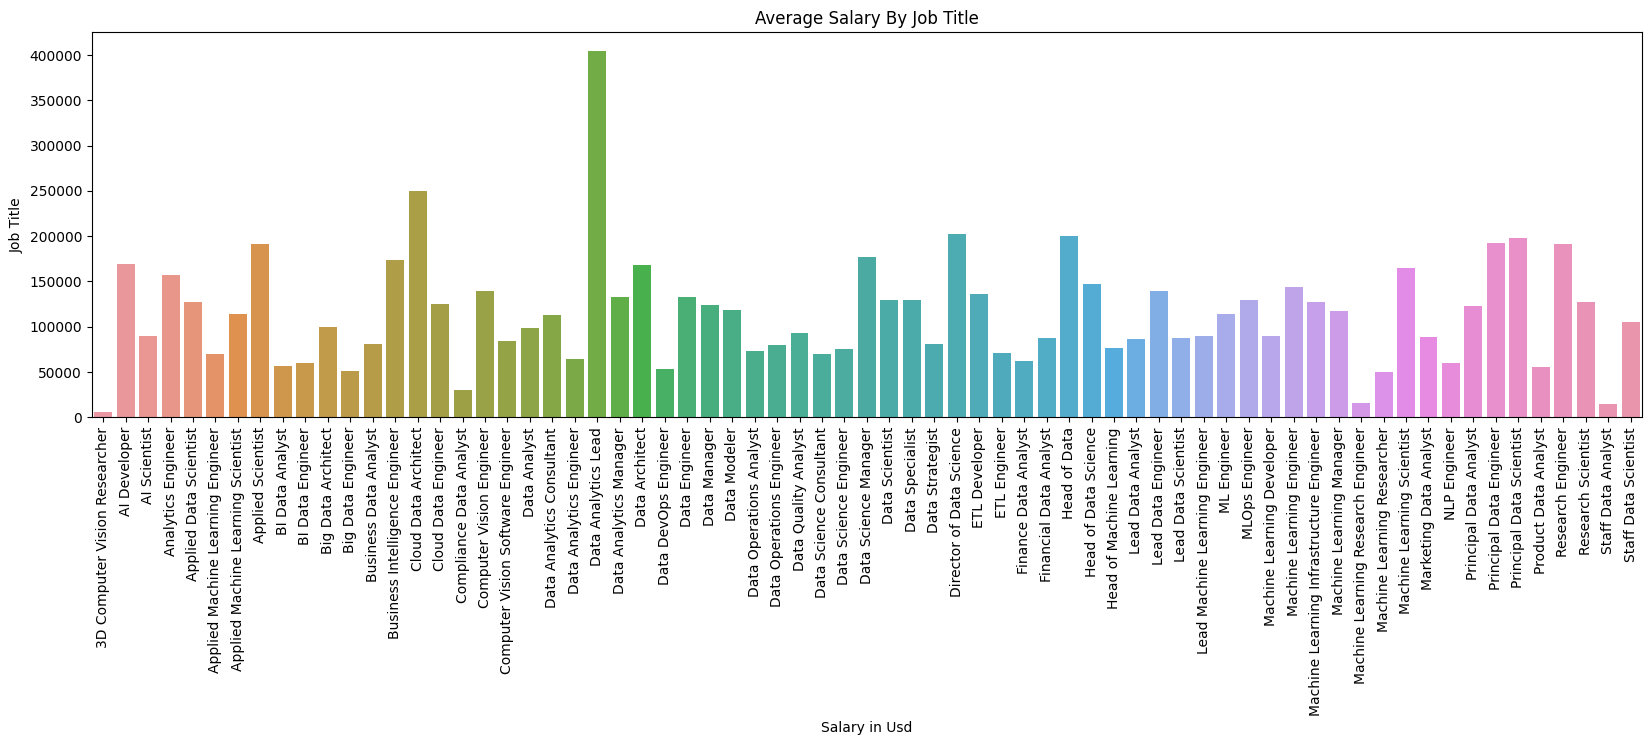

In [61]:
selected_data = data[['salary_in_usd'] + ['job_title']]

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='job_title', y='salary_in_usd', data=selected_data, errorbar=None)

ax.set_title('Average Salary By Job Title')
ax.set_ylabel('Job Title')
ax.set_xlabel('Salary in Usd')
ax.tick_params(axis='x', rotation=90)

In [62]:
selected_data['job_title'].value_counts()

Data Scientist                       282
Data Engineer                        277
Data Analyst                         177
Machine Learning Engineer             98
Analytics Engineer                    47
                                    ... 
Cloud Data Architect                   1
Big Data Architect                     1
BI Data Engineer                       1
Applied Machine Learning Engineer      1
Staff Data Scientist                   1
Name: job_title, Length: 69, dtype: int64

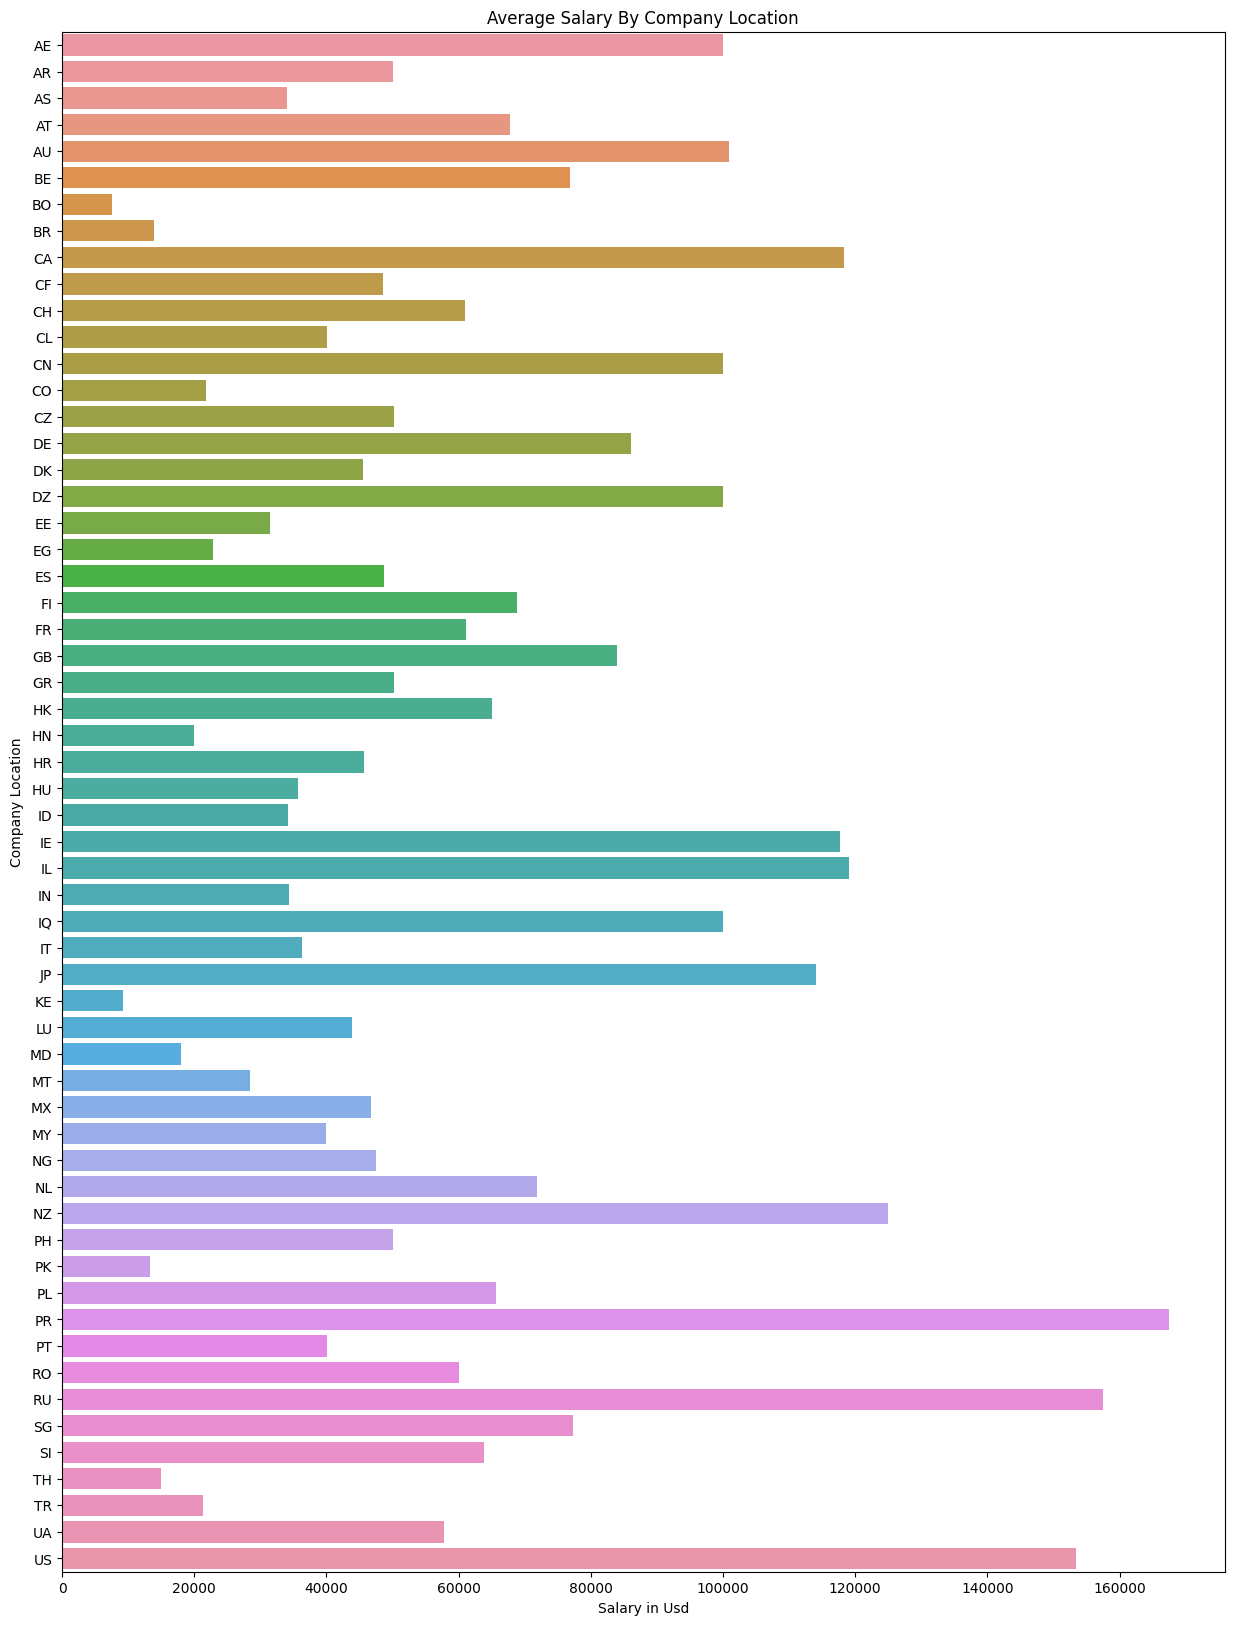

In [63]:
selected_data = data[['salary_in_usd'] + ['company_location']]

plt.figure(figsize=(15, 20))
ax = sns.barplot(y='company_location', x='salary_in_usd', data=selected_data, errorbar=None)

ax.set_title('Average Salary By Company Location')
ax.set_ylabel('Company Location')
ax.set_xlabel('Salary in Usd')
ax.tick_params(axis='x')

<ipython-input-64-3432687fca93>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='company_location', y='salary_in_usd', hue='experience_level', ci=None, palette='viridis')


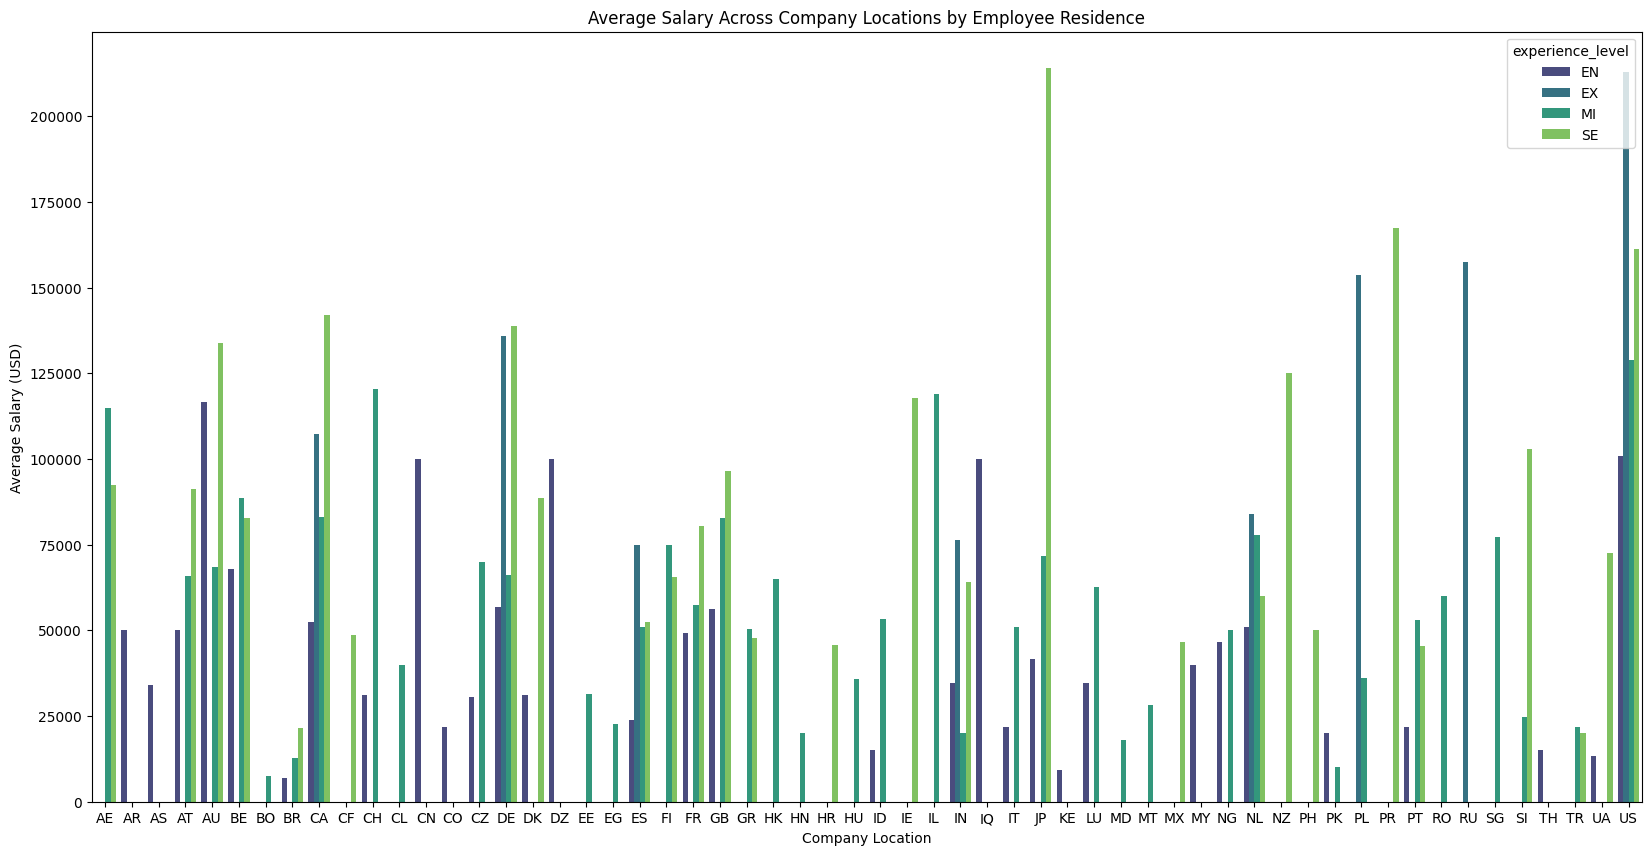

In [64]:
plt.figure(figsize=(20, 10))
sns.barplot(data=data, x='company_location', y='salary_in_usd', hue='experience_level', ci=None, palette='viridis')
plt.title('Average Salary Across Company Locations by Employee Residence')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.show()

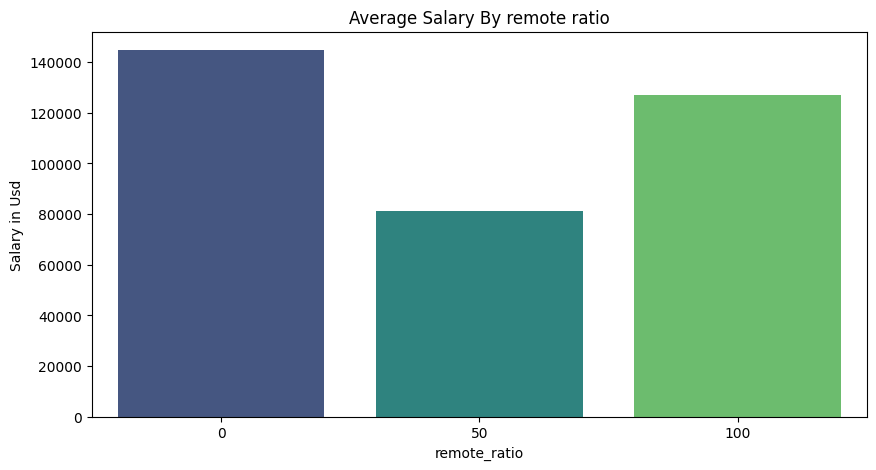

In [65]:
selected_data = data[['salary_in_usd'] + ['remote_ratio']]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='remote_ratio', y='salary_in_usd', data=selected_data, errorbar=None, palette='viridis')

ax.set_title('Average Salary By remote ratio')
ax.set_xlabel('remote_ratio')
ax.set_ylabel('Salary in Usd')
ax.tick_params(axis='x')

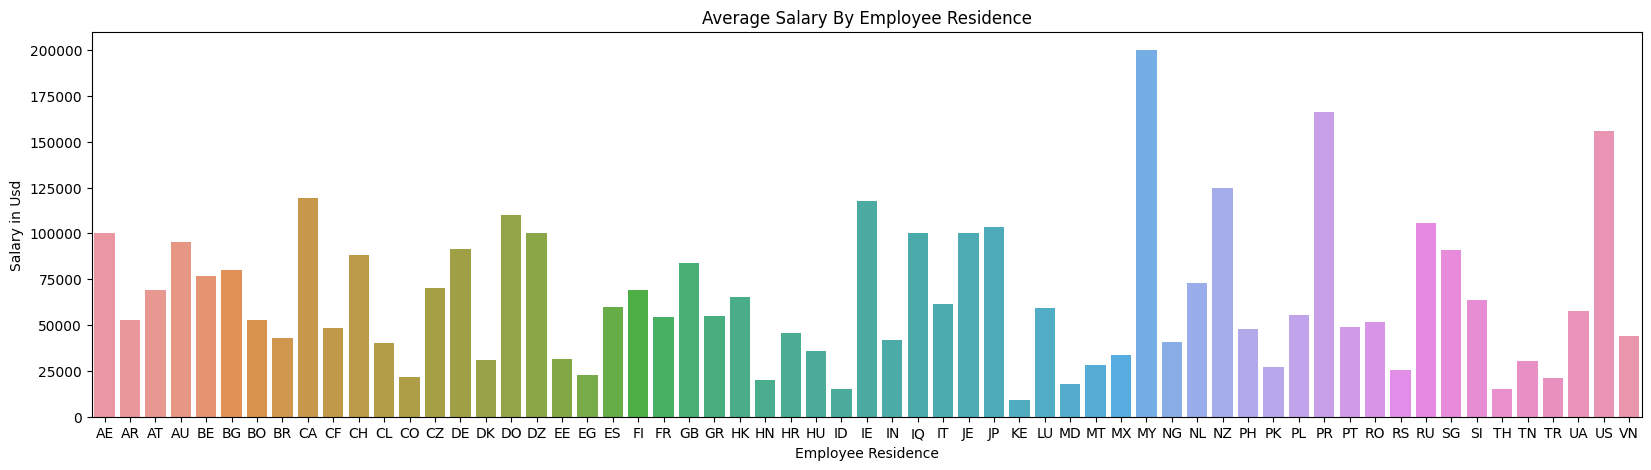

In [66]:
selected_data = data[['salary_in_usd'] + ['employee_residence']]

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='employee_residence', y='salary_in_usd', data=selected_data, errorbar=None)

ax.set_title('Average Salary By Employee Residence')
ax.set_xlabel('Employee Residence')
ax.set_ylabel('Salary in Usd')
ax.tick_params(axis='x')

<ipython-input-67-16e30bfa4d03>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='deep')


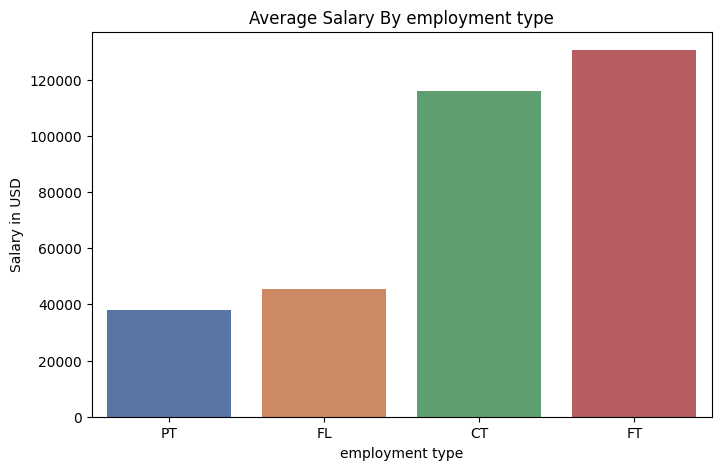

In [67]:
employment_type_order = ["PT","FL","CT","FT"]
selected_data = data[['salary_in_usd'] + ['employment_type']]


plt.figure(figsize=(8, 5))
ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='deep')

ax.set_title('Average Salary By employment type')
ax.set_xlabel('employment type')
ax.set_ylabel('Salary in USD')
plt.show()

<ipython-input-68-07185c282fbe>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='viridis')


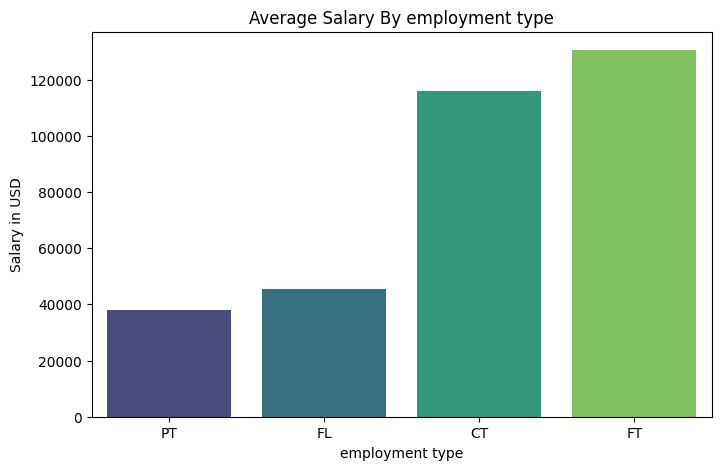

In [68]:
employment_type_order = ["PT","FL","CT","FT"]
selected_data = data[['salary_in_usd'] + ['employment_type']]


plt.figure(figsize=(8, 5))
ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='viridis')

ax.set_title('Average Salary By employment type')
ax.set_xlabel('employment type')
ax.set_ylabel('Salary in USD')
plt.show()

<ipython-input-69-07185c282fbe>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='viridis')


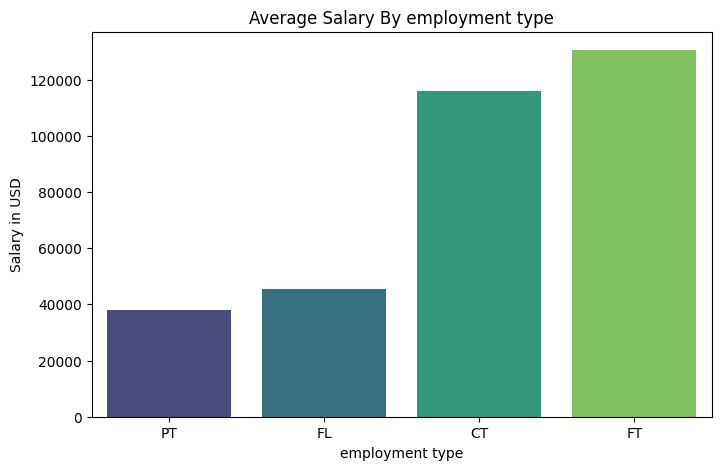

In [69]:
employment_type_order = ["PT","FL","CT","FT"]
selected_data = data[['salary_in_usd'] + ['employment_type']]


plt.figure(figsize=(8, 5))
ax = sns.barplot(x='employment_type', y='salary_in_usd', data=selected_data, order=employment_type_order, ci=None, palette='viridis')

ax.set_title('Average Salary By employment type')
ax.set_xlabel('employment type')
ax.set_ylabel('Salary in USD')
plt.show()

<ipython-input-70-285056a47a20>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='viridis')


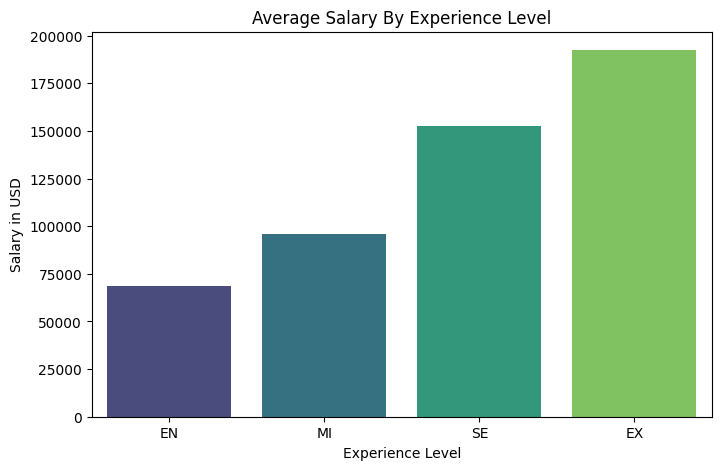

In [70]:
experience_level_order = ["EN", "MI", "SE", "EX"]
selected_data = data[['salary_in_usd'] + ['experience_level']]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='viridis')

ax.set_title('Average Salary By Experience Level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
plt.show()

<ipython-input-71-9ce3e35a2035>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='pastel')


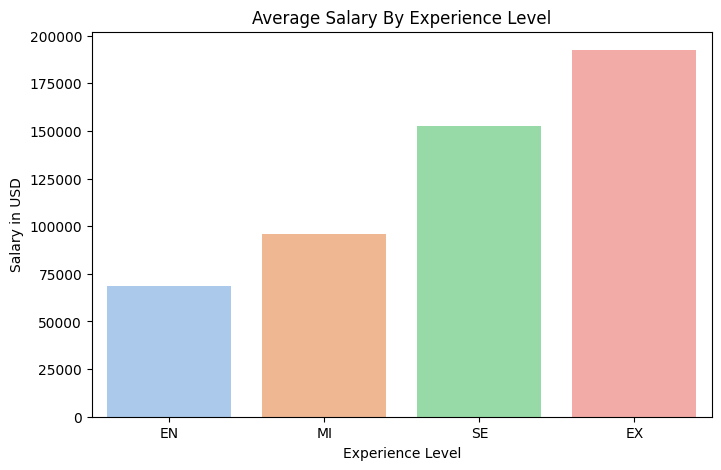

In [71]:
experience_level_order = ["EN", "MI", "SE", "EX"]
selected_data = data[['salary_in_usd'] + ['experience_level']]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='pastel')

ax.set_title('Average Salary By Experience Level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
plt.show()

<ipython-input-72-a1f7c88d00b1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='deep')


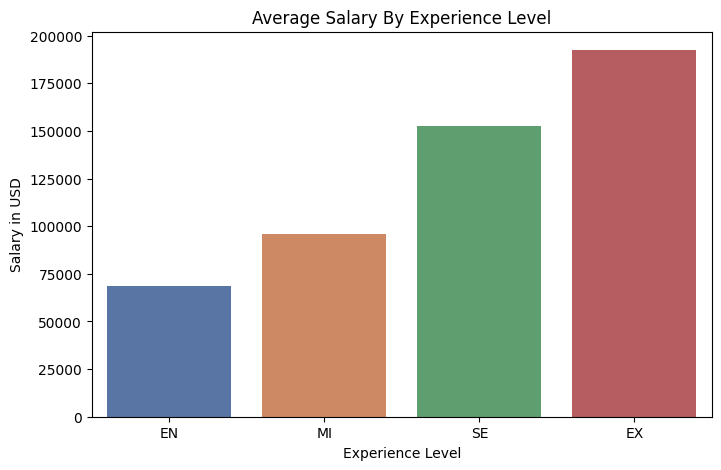

In [72]:
experience_level_order = ["EN", "MI", "SE", "EX"]
selected_data = data[['salary_in_usd'] + ['experience_level']]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='experience_level', y='salary_in_usd', data=selected_data, order=experience_level_order, ci=None, palette='deep')

ax.set_title('Average Salary By Experience Level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
plt.show()

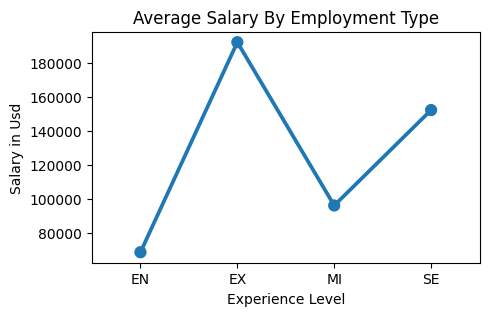

In [73]:
selected_data = data[['salary_in_usd'] + ['experience_level']]

plt.figure(figsize=(5, 3))
ax = sns.pointplot(x='experience_level', y='salary_in_usd', data=selected_data, errorbar=None)

ax.set_title('Average Salary By Employment Type')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in Usd')
ax.tick_params(axis='x')

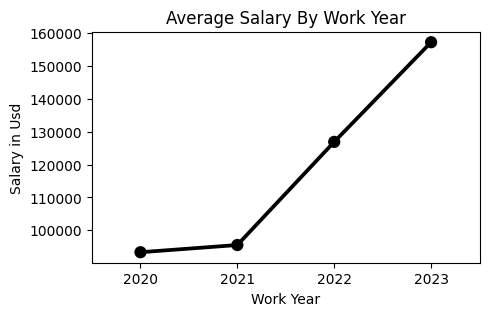

In [74]:
selected_data = data[['salary_in_usd'] + ['work_year']]

plt.figure(figsize=(5, 3))
ax = sns.pointplot(x='work_year', y='salary_in_usd', data=selected_data, errorbar=None, color='black')

ax.set_title('Average Salary By Work Year')
ax.set_xlabel('Work Year')
ax.set_ylabel('Salary in Usd')
ax.tick_params(axis='x')

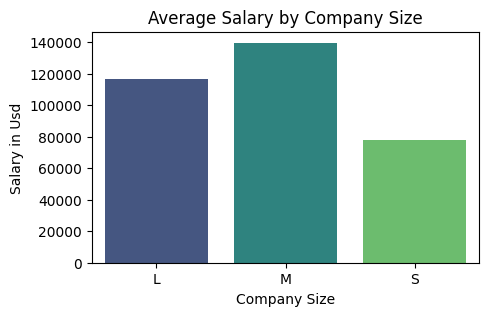

In [75]:
selected_data = data[['salary_in_usd'] + ['company_size']]

plt.figure(figsize=(5, 3))
ax = sns.barplot(x='company_size', y='salary_in_usd', data=selected_data, errorbar=None, palette='viridis')

ax.set_title('Average Salary by Company Size')
ax.set_xlabel('Company Size')
ax.set_ylabel('Salary in Usd')
ax.tick_params(axis='x')

In [76]:
import urllib.request
import pandas as pd
import requests
import io
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

---------------------------------------------------------

--------------------------------------------------------------------

In [77]:
df_new = pd.read_csv('./2023-S2-FOAI-assignment.csv')

In [78]:
df_new

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1495,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
1496,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
1497,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1498,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


In [79]:
df_dummies_employee = pd.get_dummies(df_new["employee_residence"], prefix='employeeResidence_')
df_dummies_company = pd.get_dummies(df_new["company_location"], prefix='companyLocation_')

In [80]:
df_complete = pd.concat([df_new, df_dummies_employee, df_dummies_company], axis=1)

In [81]:
column_list_1 = df_dummies_employee.columns.tolist()

In [82]:
column_list_2 = df_dummies_company.columns.tolist()

In [83]:
print(column_list_1)

['employeeResidence__AE', 'employeeResidence__AR', 'employeeResidence__AT', 'employeeResidence__AU', 'employeeResidence__BE', 'employeeResidence__BG', 'employeeResidence__BO', 'employeeResidence__BR', 'employeeResidence__CA', 'employeeResidence__CF', 'employeeResidence__CH', 'employeeResidence__CL', 'employeeResidence__CO', 'employeeResidence__CZ', 'employeeResidence__DE', 'employeeResidence__DK', 'employeeResidence__DO', 'employeeResidence__DZ', 'employeeResidence__EE', 'employeeResidence__EG', 'employeeResidence__ES', 'employeeResidence__FI', 'employeeResidence__FR', 'employeeResidence__GB', 'employeeResidence__GR', 'employeeResidence__HK', 'employeeResidence__HN', 'employeeResidence__HR', 'employeeResidence__HU', 'employeeResidence__ID', 'employeeResidence__IE', 'employeeResidence__IN', 'employeeResidence__IQ', 'employeeResidence__IT', 'employeeResidence__JE', 'employeeResidence__JP', 'employeeResidence__KE', 'employeeResidence__LU', 'employeeResidence__MD', 'employeeResidence__MT',

In [84]:
print(column_list_2)

['companyLocation__AE', 'companyLocation__AR', 'companyLocation__AS', 'companyLocation__AT', 'companyLocation__AU', 'companyLocation__BE', 'companyLocation__BO', 'companyLocation__BR', 'companyLocation__CA', 'companyLocation__CF', 'companyLocation__CH', 'companyLocation__CL', 'companyLocation__CN', 'companyLocation__CO', 'companyLocation__CZ', 'companyLocation__DE', 'companyLocation__DK', 'companyLocation__DZ', 'companyLocation__EE', 'companyLocation__EG', 'companyLocation__ES', 'companyLocation__FI', 'companyLocation__FR', 'companyLocation__GB', 'companyLocation__GR', 'companyLocation__HK', 'companyLocation__HN', 'companyLocation__HR', 'companyLocation__HU', 'companyLocation__ID', 'companyLocation__IE', 'companyLocation__IL', 'companyLocation__IN', 'companyLocation__IQ', 'companyLocation__IT', 'companyLocation__JP', 'companyLocation__KE', 'companyLocation__LU', 'companyLocation__MD', 'companyLocation__MT', 'companyLocation__MX', 'companyLocation__MY', 'companyLocation__NG', 'companyLo

In [85]:
column_list_final = column_list_1 + column_list_2

In [86]:
column_list_final.append('salary_in_usd')

In [87]:
# drop null
df_complete = df_complete.dropna()

In [88]:
X = df_complete[column_list_final]

In [89]:
y = df_complete["remote_ratio"]

In [90]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=9)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5775401069518716


In [92]:
print(y_pred)

[  0 100 100 100   0 100 100 100 100 100 100   0 100 100 100 100 100 100
 100 100 100   0 100 100 100 100   0 100 100   0 100 100 100 100 100 100
 100 100 100 100  50 100 100 100   0   0 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100  50
 100 100 100 100 100 100 100 100 100 100 100 100 100 100   0  50 100 100
   0 100 100 100   0 100 100   0 100 100 100   0 100  50 100 100 100 100
   0   0 100 100 100 100 100 100 100 100 100 100 100   0 100  50 100 100
 100 100 100 100 100 100   0   0 100 100 100 100 100 100 100 100 100 100
   0   0 100 100 100 100 100 100   0 100  50 100   0 100 100 100 100 100
 100 100 100 100 100   0 100 100 100 100   0 100 100 100 100 100   0 100
 100 100   0 100 100 100 100   0 100 100 100 100 100 100 100 100   0   0
 100 100 100   0 100 100 100 100 100 100 100 100 100 100   0   0  50 100
 100   0 100   0 100   0 100 100  50   0 100   0 100   0 100 100 100  50
   0 100  50 100 100 100 100 100 100 100 100 100 10

In [93]:
df_new

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1495,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
1496,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
1497,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1498,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


In [94]:
df_dummies_job = pd.get_dummies(df_new["job_title"], prefix='jobtitle_')
df_dummies_experience = pd.get_dummies(df_new["experience_level"], prefix='experiencelevel_')

In [95]:
df_complete = pd.concat([df_new, df_dummies_job, df_dummies_experience], axis=1)

In [96]:
column_list_1 = df_dummies_job.columns.tolist()

In [97]:
column_list_2 = df_dummies_experience.columns.tolist()

In [98]:
print(column_list_1)

['jobtitle__3D Computer Vision Researcher', 'jobtitle__AI Developer', 'jobtitle__AI Scientist', 'jobtitle__Analytics Engineer', 'jobtitle__Applied Data Scientist', 'jobtitle__Applied Machine Learning Engineer', 'jobtitle__Applied Machine Learning Scientist', 'jobtitle__Applied Scientist', 'jobtitle__BI Data Analyst', 'jobtitle__BI Data Engineer', 'jobtitle__Big Data Architect', 'jobtitle__Big Data Engineer', 'jobtitle__Business Data Analyst', 'jobtitle__Business Intelligence Engineer', 'jobtitle__Cloud Data Architect', 'jobtitle__Cloud Data Engineer', 'jobtitle__Compliance Data Analyst', 'jobtitle__Computer Vision Engineer', 'jobtitle__Computer Vision Software Engineer', 'jobtitle__Data Analyst', 'jobtitle__Data Analytics Consultant', 'jobtitle__Data Analytics Engineer', 'jobtitle__Data Analytics Lead', 'jobtitle__Data Analytics Manager', 'jobtitle__Data Architect', 'jobtitle__Data DevOps Engineer', 'jobtitle__Data Engineer', 'jobtitle__Data Manager', 'jobtitle__Data Modeler', 'jobtitl

In [99]:
print(column_list_2)

['experiencelevel__EN', 'experiencelevel__EX', 'experiencelevel__MI', 'experiencelevel__SE']


In [100]:
column_list_final = column_list_1 + column_list_2

In [101]:
column_list_final.append('salary_in_usd')

In [102]:
# drop null
df_complete = df_complete.dropna()

In [103]:
X = df_complete[column_list_final]

In [104]:
y = df_complete["company_size"]

In [105]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=9)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7165775401069518


In [107]:
print(y_pred)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'S' 'M' 'L' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'L' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'S' 'M' 'M' 'M' 'M' 'M' 'L' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'S' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'S' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'S' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'M' 'M' 'M' 'M' 'M'
 'L' 'M' 'M' 'L' 'L' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'L' 'M' 'L' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'M' 'M' 'M' 'L'
 'S' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'S' 'M' 'M

In [108]:
df_new

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1495,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
1496,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
1497,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
1498,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


In [109]:
df_dummies_employment = pd.get_dummies(df_new["employment_type"], prefix='employmenttype_')
df_dummies_experience = pd.get_dummies(df_new["experience_level"], prefix='experiencelevel_')

In [110]:
df_complete = pd.concat([df_new, df_dummies_employment, df_dummies_experience], axis=1)

In [111]:
column_list_1 = df_dummies_employment.columns.tolist()

In [112]:
column_list_2 = df_dummies_experience.columns.tolist()

In [113]:
print(column_list_1)

['employmenttype__CT', 'employmenttype__FL', 'employmenttype__FT', 'employmenttype__PT']


In [114]:
print(column_list_2)

['experiencelevel__EN', 'experiencelevel__EX', 'experiencelevel__MI', 'experiencelevel__SE']


In [115]:
column_list_1 = df_dummies_employment.columns.tolist()

column_list_2 = df_dummies_experience.columns.tolist()

print(column_list_1)

print(column_list_2)

['employmenttype__CT', 'employmenttype__FL', 'employmenttype__FT', 'employmenttype__PT']
['experiencelevel__EN', 'experiencelevel__EX', 'experiencelevel__MI', 'experiencelevel__SE']


In [116]:
column_list_final = column_list_1 + column_list_2

In [117]:
column_list_final.append('salary_in_usd')

In [118]:
column_list_final.append('remote_ratio')# Calculate percentages for each category
experience_level_percentage = (df['experience_level'].value_counts(normalize=True) * 100).reset_index()
experience_level_percentage.columns = ['experience_level', 'percentage']

employment_type_percentage = (df['employment_type'].value_counts(normalize=True) * 100).reset_index()
employment_type_percentage.columns = ['employment_type', 'percentage']

job_title_percentage = (df['job_title'].value_counts(normalize=True) * 100).reset_index()
job_title_percentage.columns = ['job_title', 'percentage']

KeyError: ignored

In [ ]:
# drop null
df_complete = df_complete.dropna()

In [ ]:
X = df_complete[column_list_final]

In [ ]:
y = df_complete["experience_level"]

In [ ]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# drop null
df_complete = df_complete.dropna()

X = df_complete[column_list_final]

y = df_complete["experience_level"]

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=9)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(y_pred)